### Travel Package Purchase Prediction

## Background and Context

The Policy Maker of "Visit with us", a tourism company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

The company in the last campaign contacted the customers at random without looking at the available information. However, this time company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being, and wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


## Objective

* To analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


## Data Dictionary

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer
* Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

### Import Libraries

In [57]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

from sklearn import metrics

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')
# For pandas profiling
from pandas_profiling import ProfileReport
print('Load Libraries-Done')
#!pip install xlrd

Load Libraries-Done


In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Load and review data

In [2]:
tdata = pd.read_excel ('Tourism.xlsx', sheet_name= 'Tourism')


In [3]:
# copying data to another variable to avoid any changes to original data
data = tdata.copy()

## View the top 5 and last 5 rows

In [4]:
data.head() #reading top 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.tail() #reading last 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
#checking shape of dataset
data.shape

(4888, 20)

Observation:
* there are 4888 rows and 20 columns
* the index column is redundant since Customer ID serves same purpose. Customer ID will not be needed for analysis and modeling so it will be dropped. 


## Check the data types of the columns of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* There appears to be missing values
* Object dtypes have to be converted to categories
* Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, Occupation,Type of Contact are categorical variables while others are numerical value.

### check for missing values

In [8]:
data.isnull().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* there are quite a number of missing values 'Age', 'Type of contact', 'Duration of pitch', 'Number of followups', 'preferred property star', 'number of trips', 'number of children visiting', and 'monthly income'

### check for duplicate values

In [9]:
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

* there are no duplicate values

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


* The mean age of customers is 37, with 18 being minimum age and 61 being the oldest
* The mean duration of pitch is 15 minutes, with 5 mins being the minumum and 127 minutes being the maximum.
* The mean monthly income is 23,619

## Data Preprocessing

In [11]:
# Let's drop customer ID
data.drop(['CustomerID'],axis=1,inplace=True)

In [12]:
# Converting the data type of categorical features to 'category' 

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact',
            'PitchSatisfactionScore']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [17]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
****************************************
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
****************************************
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
****************************************
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
****************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
****************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
****************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         

* In the Gender category, 'Female' categories seem to be 2, with one most likely due to spelling error in data entry('Fe Male' instead of 'Female'. This has to be fixed before data exploration.

In [15]:
#Fixing 'Gender' category
data['Gender'] = data['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [16]:
#Confirming category correction
data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [17]:
data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


* Most customers are in executive roles, are married and salaried.
* Majority of customers have not purchased a package

### Univariate Analysis

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observation on Age

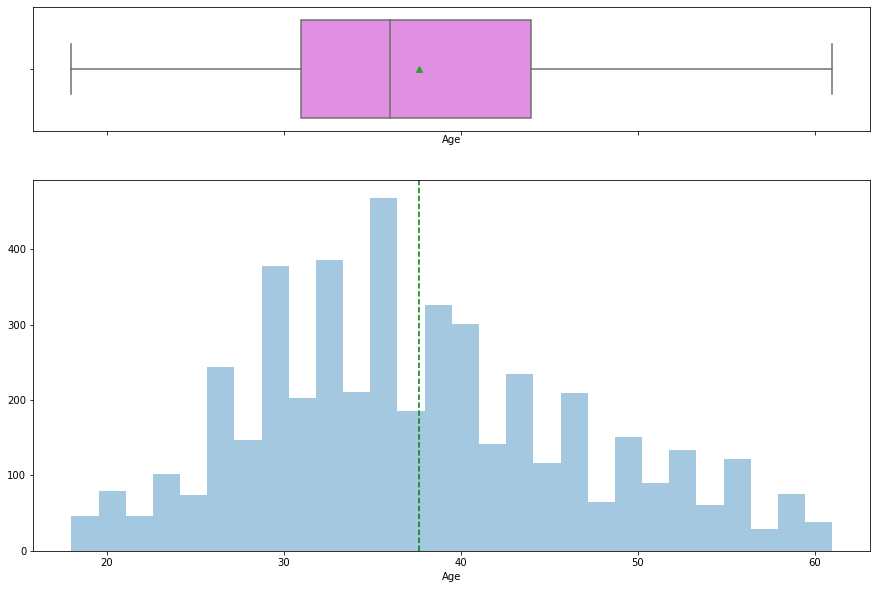

In [19]:
histogram_boxplot(data["Age"])

* Age shows a uniform distribution
* There are no outliers
* The mean age is 37, with the oldest  being 61 and youngest being 18

In [20]:
#Let's convert 'Age' to Bin to explore patterns
data['Agebin'] = pd.cut(data['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])


In [21]:
data.Agebin.value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

* Majority of customers are in the age range of 31 - 40
* Only a few customers are aged 18 - 25

### Observation on Duration of Pitch

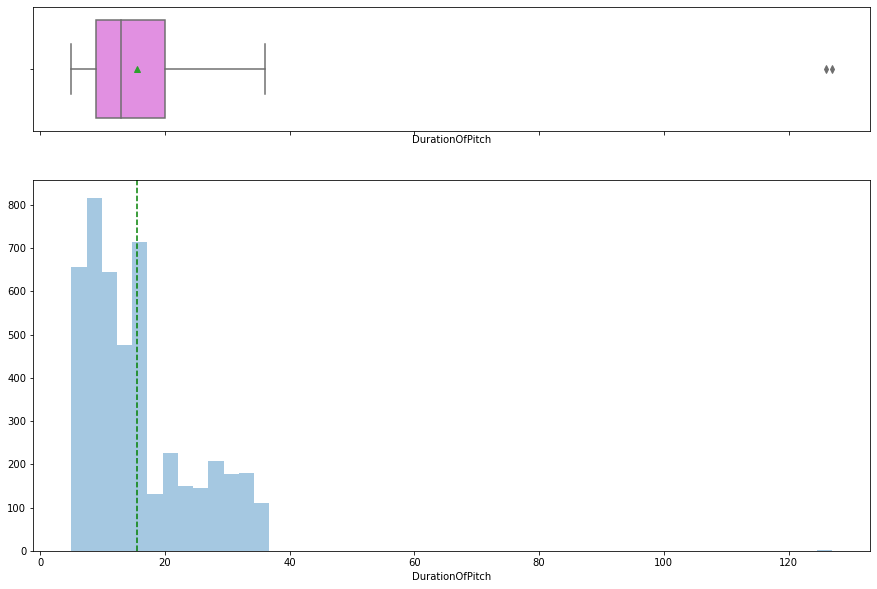

In [22]:
histogram_boxplot(data["DurationOfPitch"])

* Duration of Pitch is slightly right skewed with a couple of outliers over 120 minutes
* Mean Duration is 15 minutes

### Observation on Number of Persons Visiting

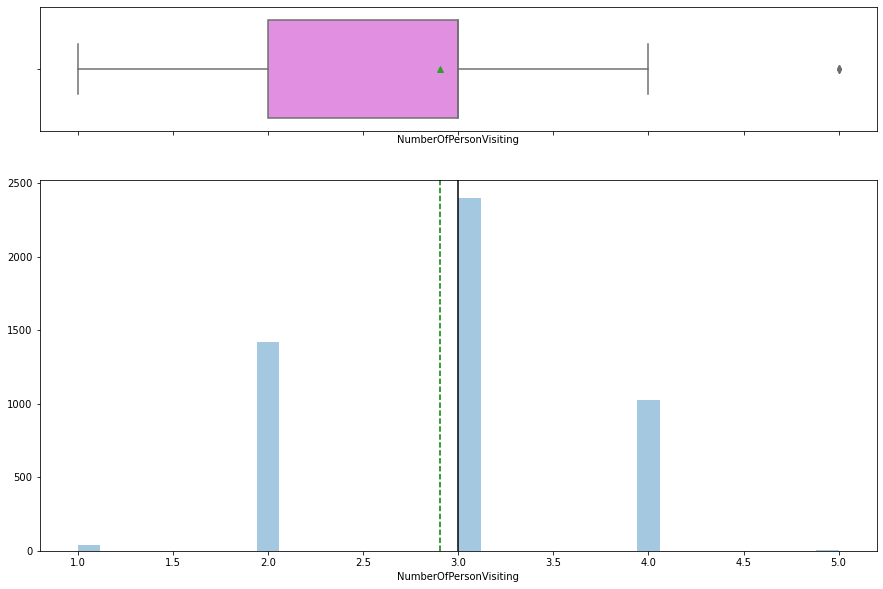

In [23]:
histogram_boxplot(data["NumberOfPersonVisiting"])

* mostly the number of persons visiting are 3 with 1 being the very least
* There is one outlier

### Observation on Number of Follow ups

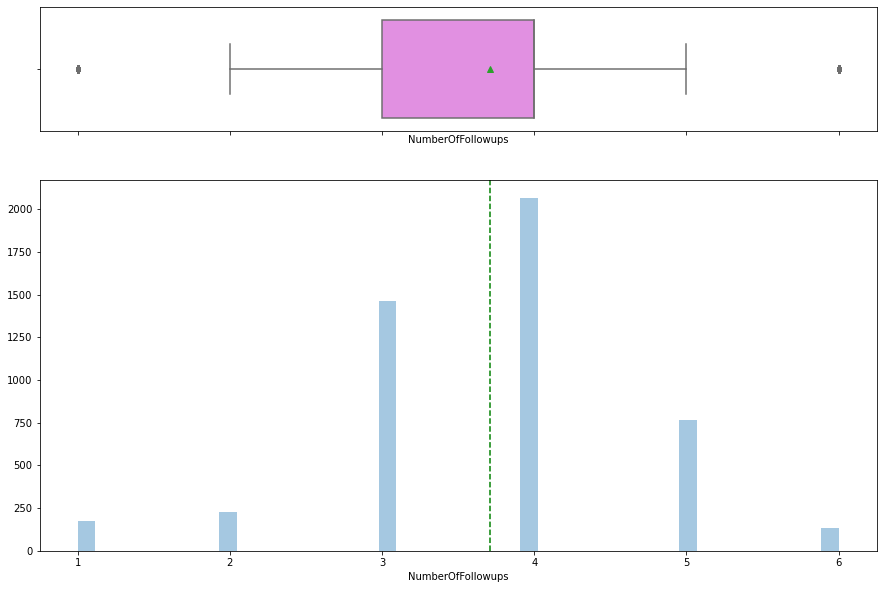

In [24]:
histogram_boxplot(data["NumberOfFollowups"])

* The highest number of follow ups is 4 with an extreme of 1 and 6

### Observation on Number of Trips

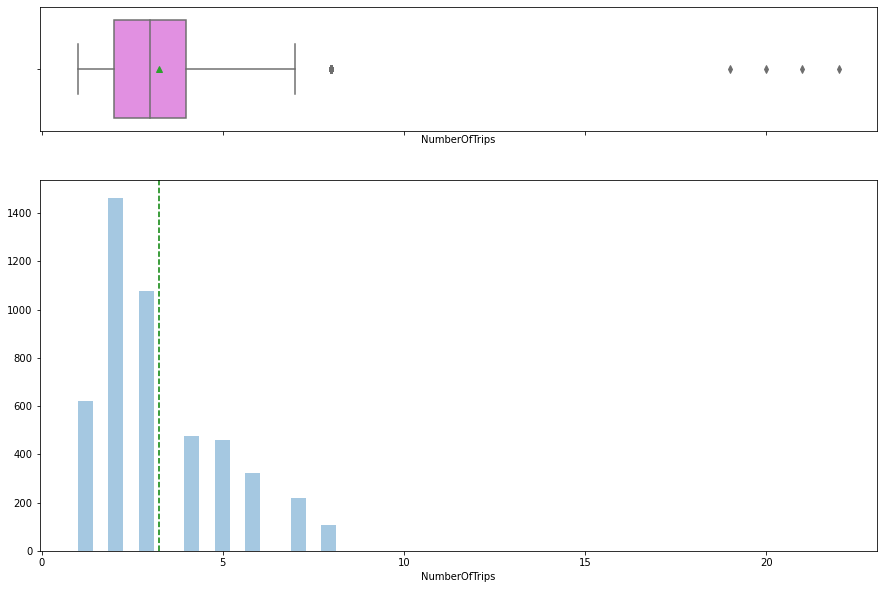

In [25]:

histogram_boxplot(data["NumberOfTrips"])

* This variable is right skewed
* Average number of trips is 3
* there are a few outliers

### Observation on Number of Children Visiting

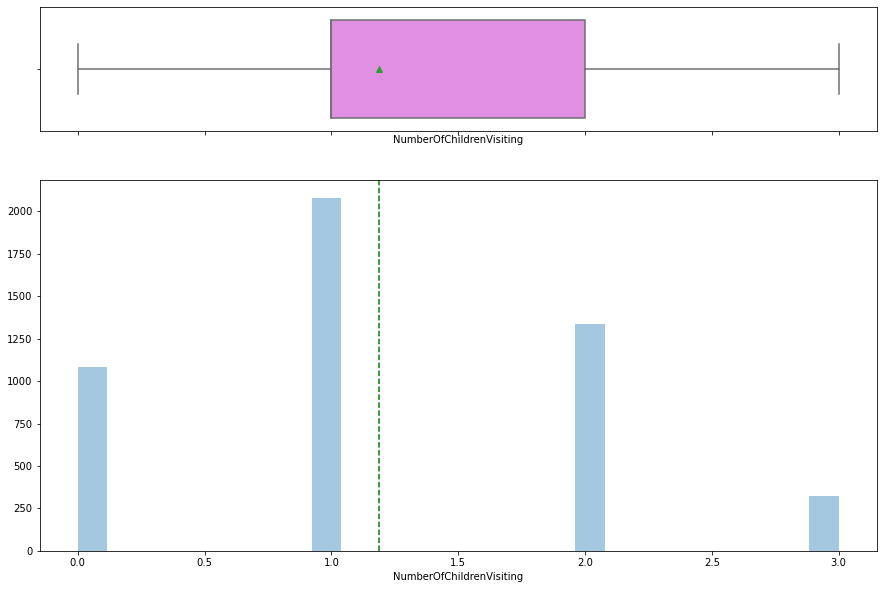

In [26]:
histogram_boxplot(data["NumberOfChildrenVisiting"])

* Number of children visiting with the customer is mostly 1

### Observation on Monthly Income

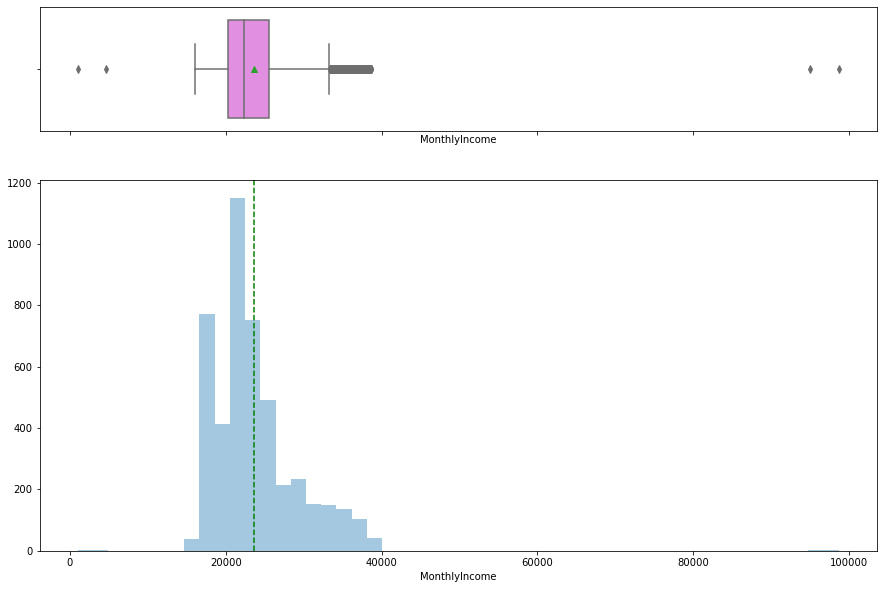

In [27]:
histogram_boxplot(data["MonthlyIncome"])

* This feature is right skewed
* The average income is about 23000
* There are several outliers, with about 98000 salary being an extreme value

### Observation on PreferredPropertyStar

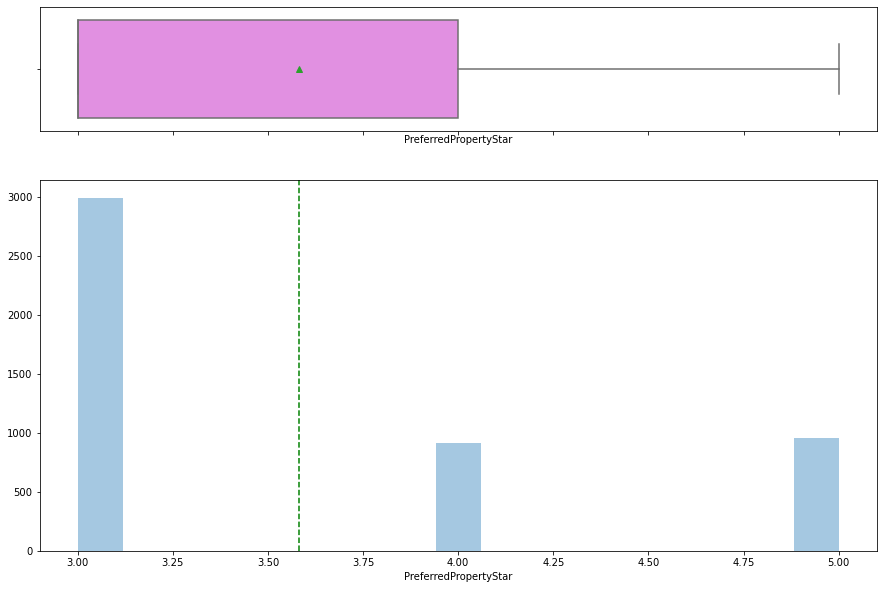

In [28]:
histogram_boxplot(data["PreferredPropertyStar"])

* the most preferred property is a 3 star

In [29]:
#Let's convert 'MonthlyIncome'to Bins for more insights
data['Incomebin'] = pd.cut(data['MonthlyIncome'], 
                    bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], 
                           labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [30]:
data.Incomebin.value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<100000       2
<15000        2
<50000        0
<45000        0
Name: Incomebin, dtype: int64

* Majority of customers earn less than 22570
* Just 2 customers are in the high end range of close to 100000
* Just 2 customers are in the low end of 15000 and below

### Observation on Categorical Variables


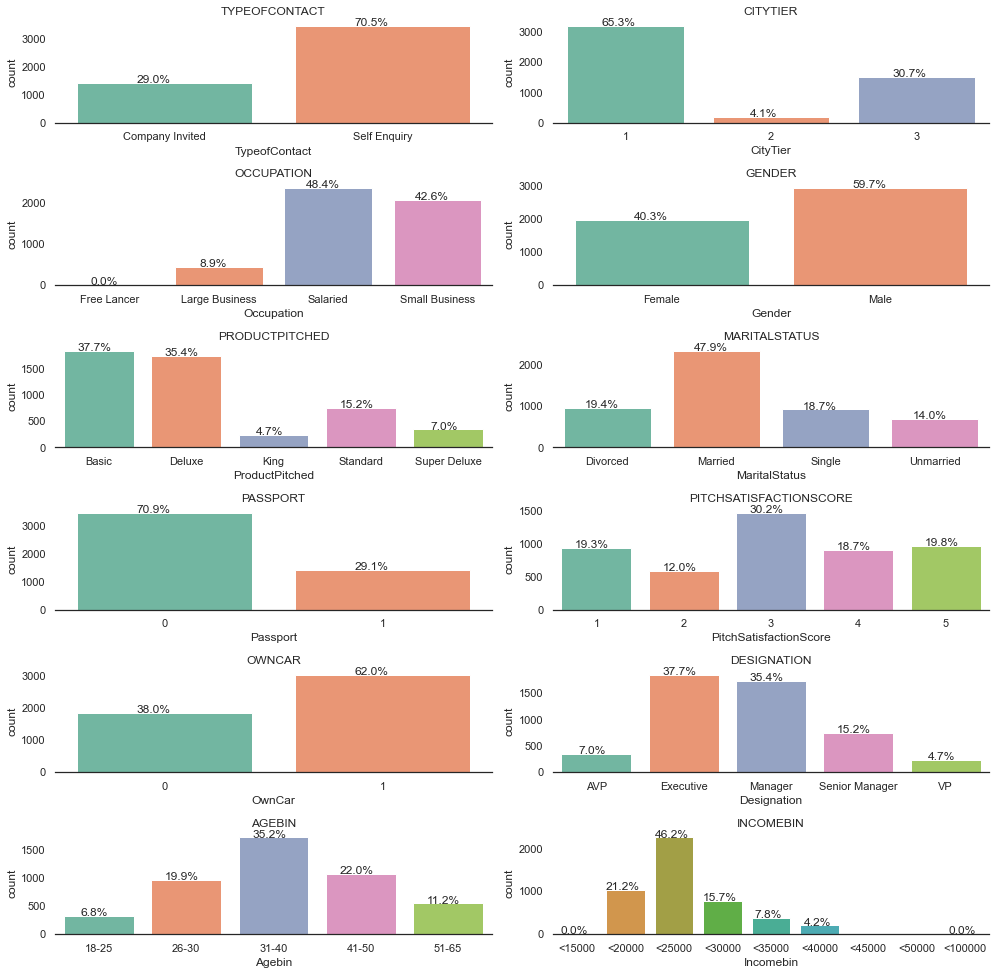

In [31]:
#Let's put all categorical variables in one display to save time

plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender','ProductPitched', 
        'MaritalStatus', 
        'Passport', 'PitchSatisfactionScore',
        'OwnCar','Designation','Agebin','Incomebin']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=data[variable], data=data)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())
                                     

Observation:
* 70.5% of customers were contacted through self inquiry
* Majority of customers are from Tier 1 cities, with the least from Tier 2
* 48.4% of Customers are salaried. None is a free lancer
* Male constitute majority of the customer population
* The major package pitched by sales reps is the basic package, immediately followed by the Deluxe.The 'King' is the least pitched.
* 61.2% of customers prefer a 3 star hotel
* majority (47.9%) of customers are married and a few (14%) are unmarried
* a huge number of customers do not have passports, with only 29.1% of customers having passports. 
* Most customers scored pitch satisfaction a level 3
* It can be seen that many of the customers own a car
* 37.7%  of customers are in executive positions, immediately followed by Managers at 35.4%
* Majority of customers are in the age category of 31-40
* Most of the customers earn a monthly income less than 25000


## Bivariate Analysis and Multivariate Analysis

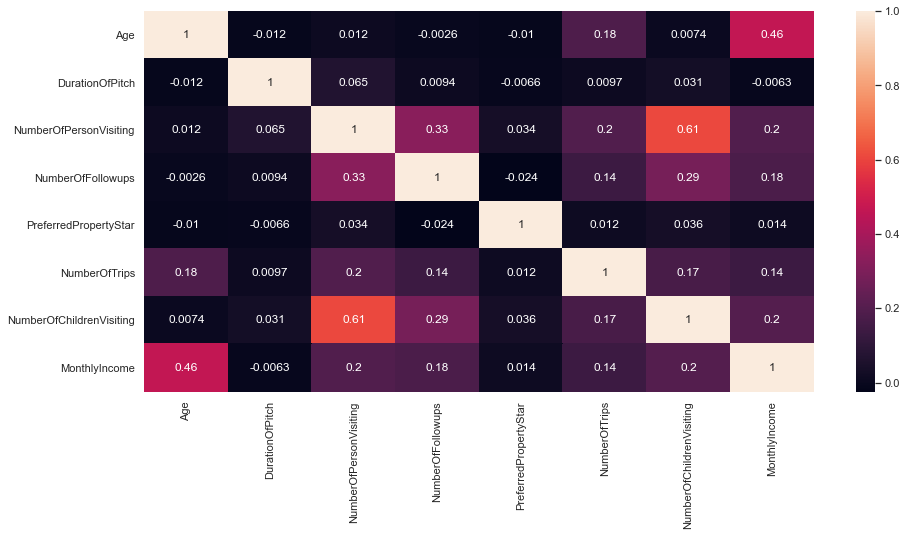

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

Obervation
* A lot of weak correlations between features are observed
* Age and duration of Pitch has the lowest correlation


In [33]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Product Taken vs Type of Contact

ProdTaken           0    1   All
TypeofContact                   
All              3946  917  4863
Self Enquiry     2837  607  3444
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


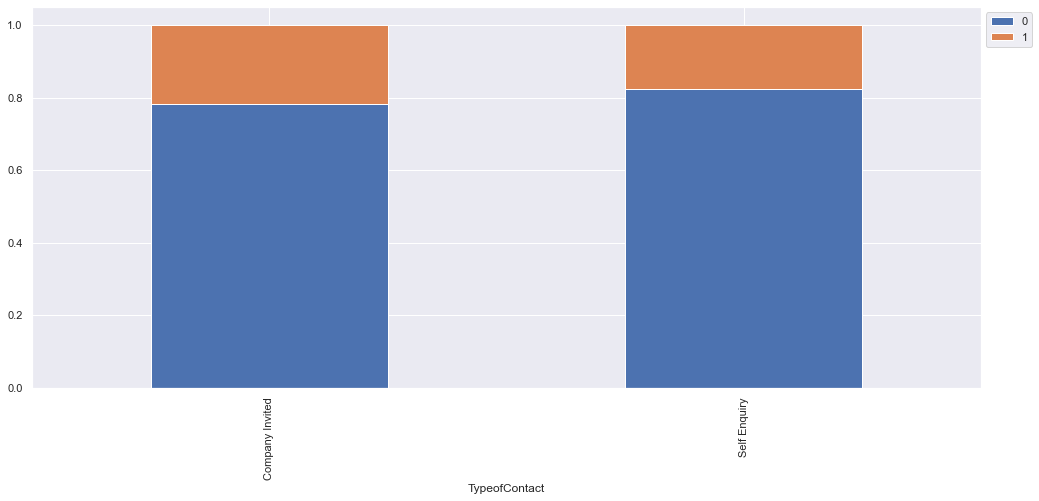

In [34]:
stacked_plot(data['TypeofContact'])

* out of each categories, it is seen that slightly more company invited customers took the packages than the self enquiry customers.

### Product Taken vs CityTier

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


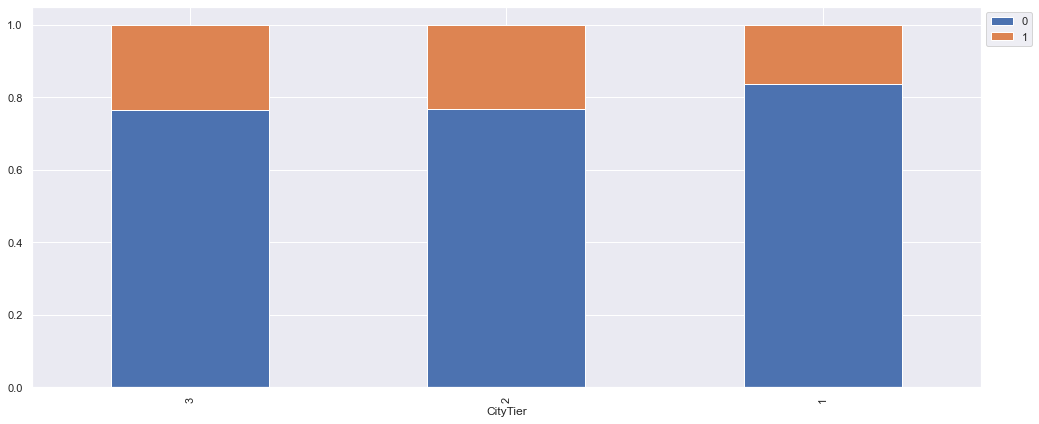

In [35]:
stacked_plot(data['CityTier'])

* As the tiers increase, customers are more likely to purchase a package

### Product Taken vs Occupation

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


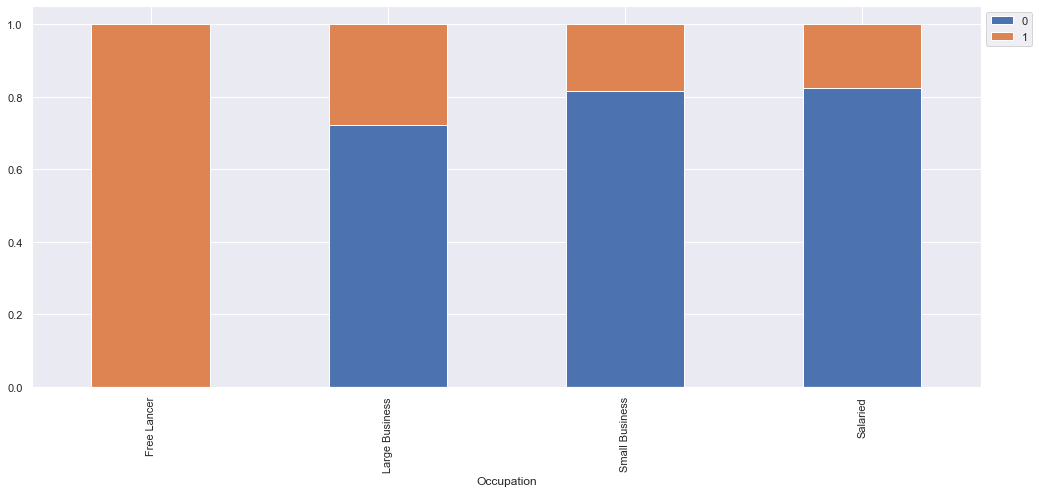

In [36]:
stacked_plot(data['Occupation'])

* Although customers who are Freelancers  have bought travel packages, the sample size is only two.
* Of the 434 Large Business owning customers, almost 30% bought travel packages.
Among Salaried and Small Business owning customers,close to 20% have bought travel packages

### Product Taken vs Gender

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


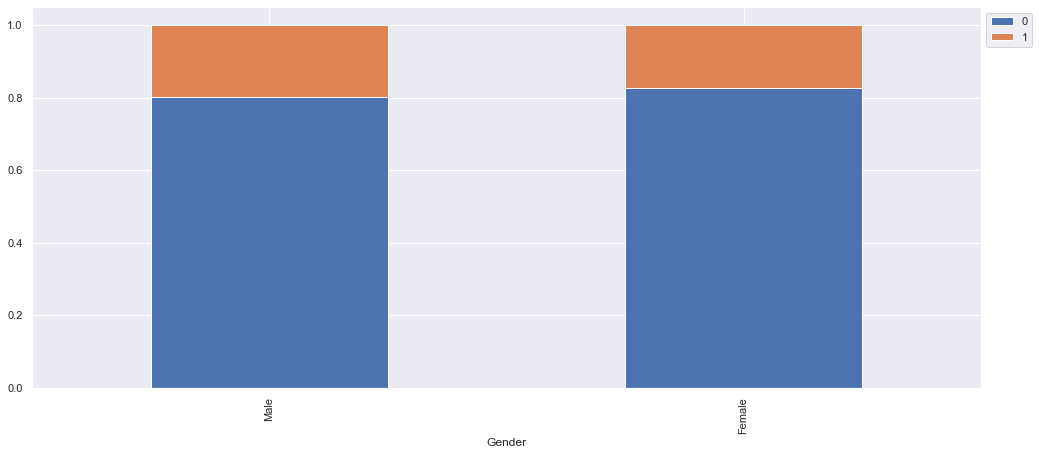

In [37]:
stacked_plot(data['Gender'])

* There is very minimal difference between males and females that purchased a package

### Product Taken vs ProductPitched

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


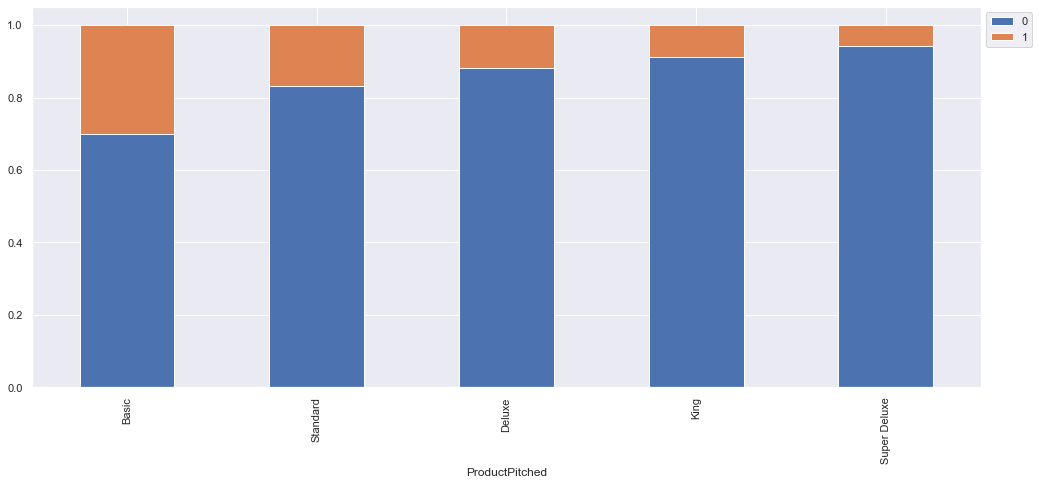

In [38]:
stacked_plot(data['ProductPitched'])

* the higher the level of package, the lower the package purchase. 
* Basic package is the most bought

### Product Taken vs Preferred Property Star

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3948  914  4862
3.0                    2511  482  2993
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


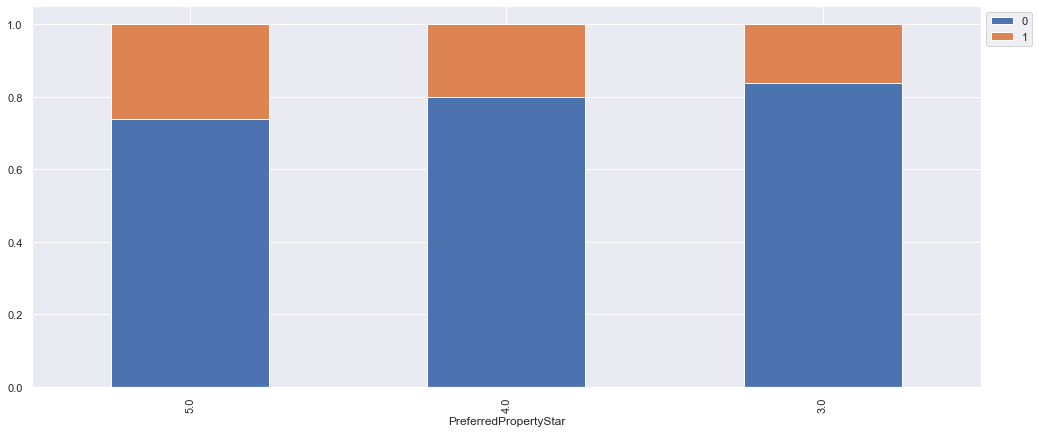

In [39]:
stacked_plot(data['PreferredPropertyStar'])

* The higher the preferred Property rating the more likely customers will buy the product package
* about 26% of customers that preferred 5 Star property bought the package and close to 20% of customers that preferred 4 star property bought the package

### Product Taken vs Marital Status

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


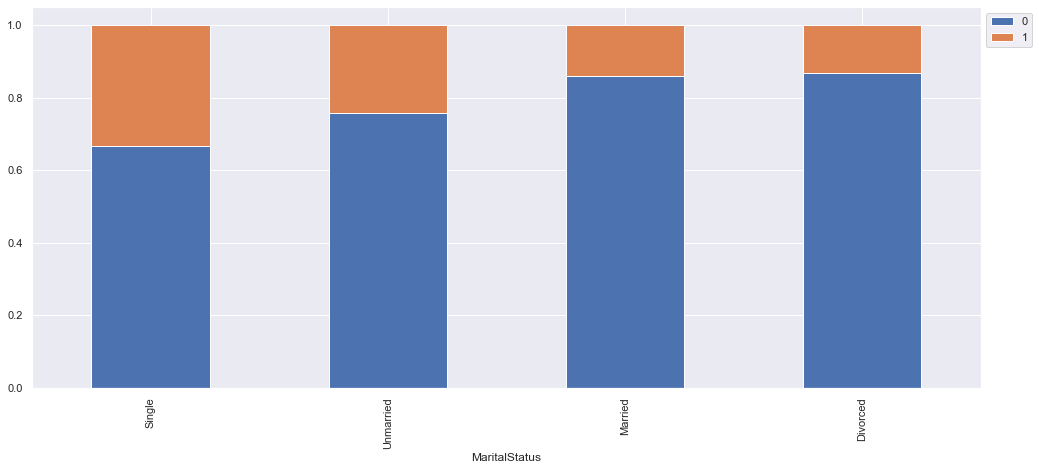

In [40]:
stacked_plot(data['MaritalStatus'])

* Single and unmarried customers appears to buy the product packages more than the married and divorced.

### Product Taken vs Passport

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


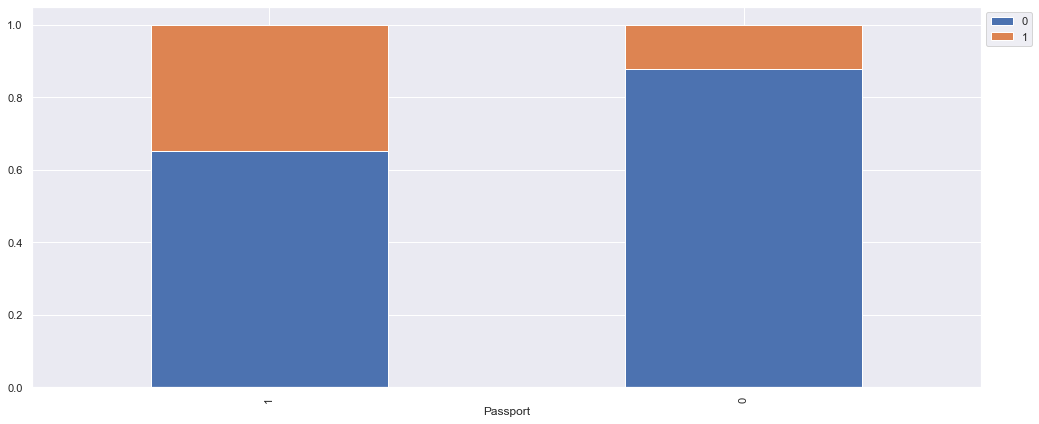

In [41]:
stacked_plot(data['Passport'])

* a relatively large percentage(34%) of customers who had passports purchased the package as opposed to about just 12% of those that did not have passports

### Product Taken vs Designation

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


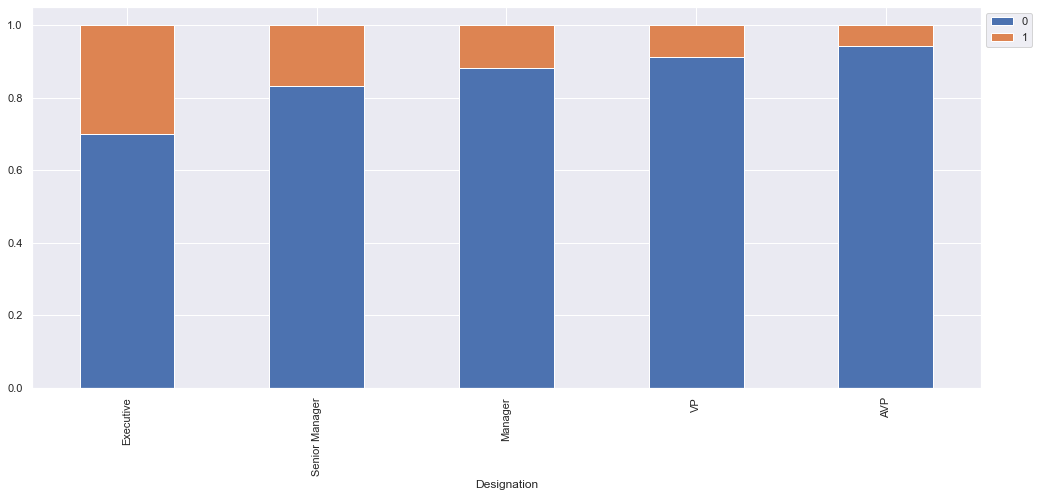

In [42]:
stacked_plot(data['Designation'])

* Around 30% Customers with Executive Designation have purchased a product
* Sr. Manager(16%) and Manager(~11%) Designation customers have purchased a product.
* Very few customers of VP and AVP Designation have purchased a product.

In [43]:
### Function to plot distributions and Boxplots of customers

def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x}  of customer who purchased a package',fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}  of customer who doesn't purchase a package",fontsize=12,fontweight='bold')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product Taken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    plt.tight_layout(pad=4)
    plt.show()

### Product Taken vs Age

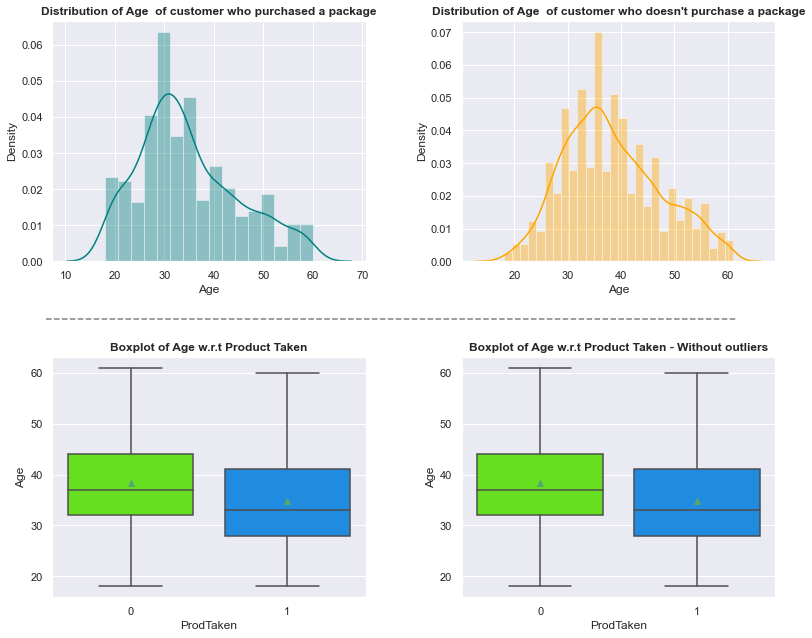

In [44]:
plot('Age')

* There is no major difference in age of customers that purchased package and those that did not.

### Product Taken vs Duration of pitch

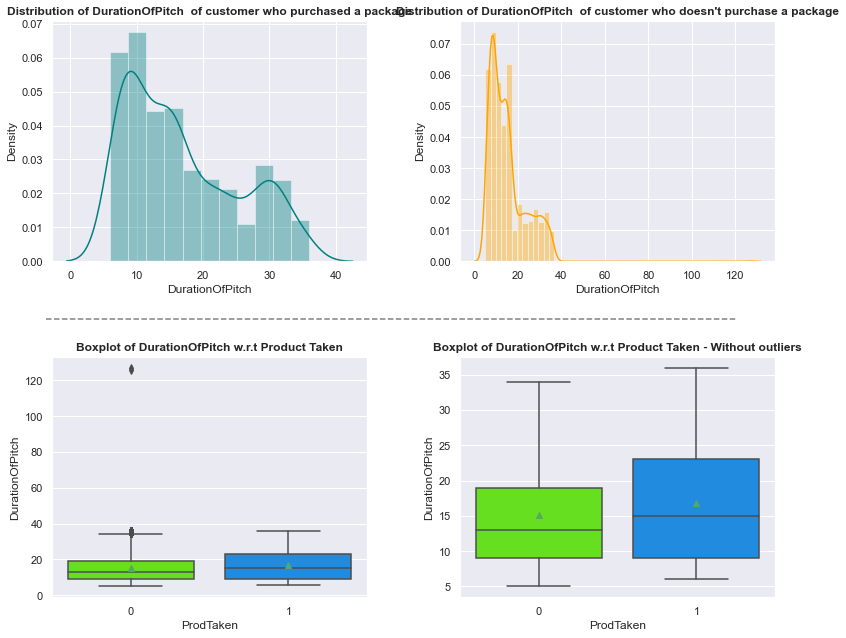

In [45]:
plot('DurationOfPitch')

* Duration of pitch for customers who purchased the package was 10-40 minutes

### Product Taken vs Number of Persons Visiting

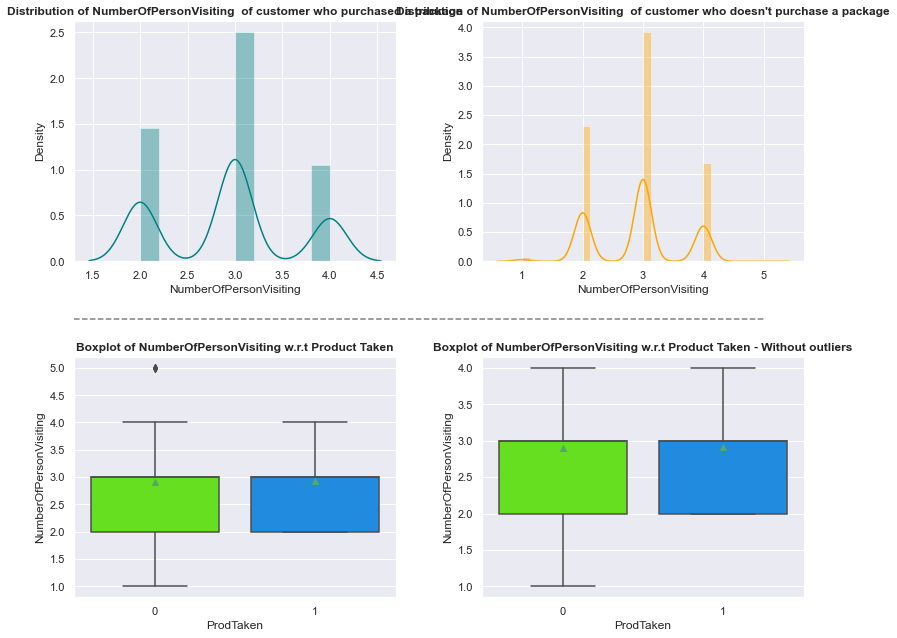

In [46]:
plot('NumberOfPersonVisiting')

* Number of persons visiting with customers is mostly between 2 and 3

### Product Taken vs Number of Follow ups

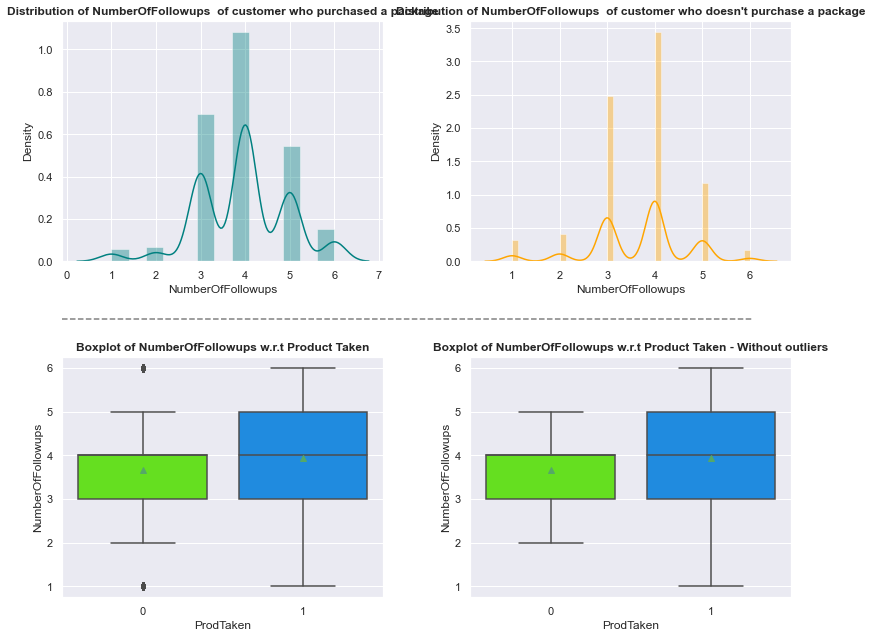

In [47]:
plot('NumberOfFollowups')

* There were mostly 3 to 5 follow ups done for customers that purchased the package

### Product Taken vs Number of Trips

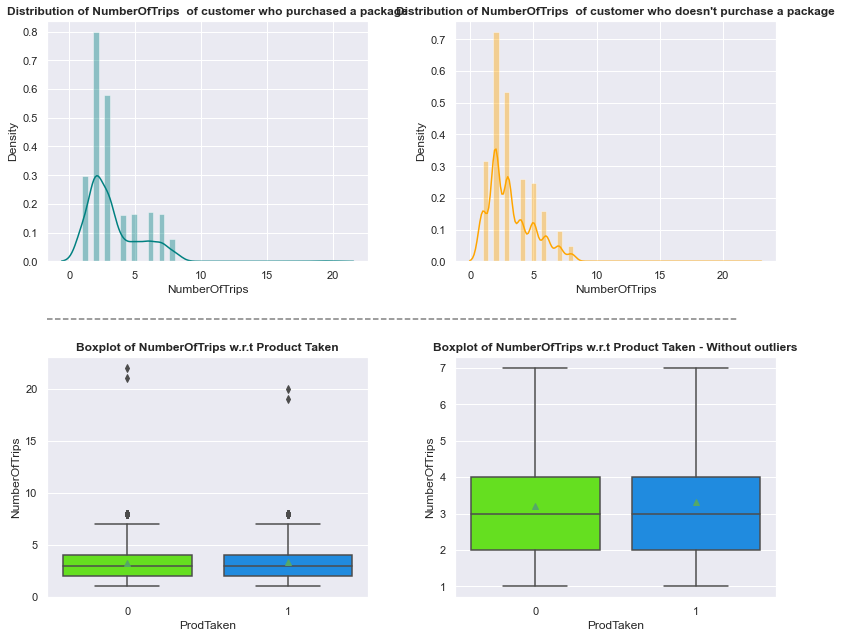

In [48]:
plot('NumberOfTrips')

* The number of trips of customers who purchased package and those that did not is not different from each other. 

### Product Taken vs Number of Children Visiting

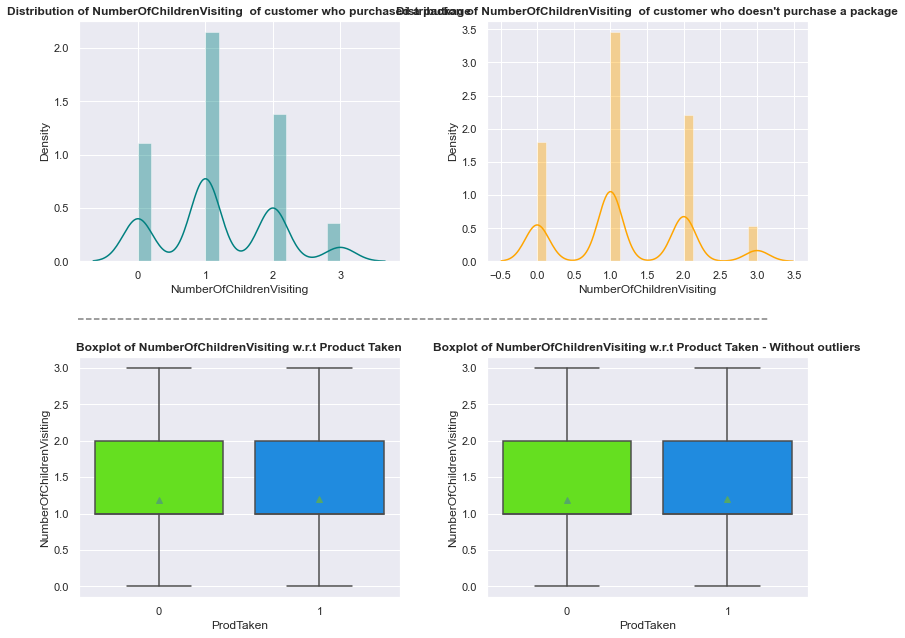

In [49]:
plot('NumberOfChildrenVisiting')

* The number of children visting with customers who purchased package and those that did not is about the same. 

### Product Taken vs Monthly Income

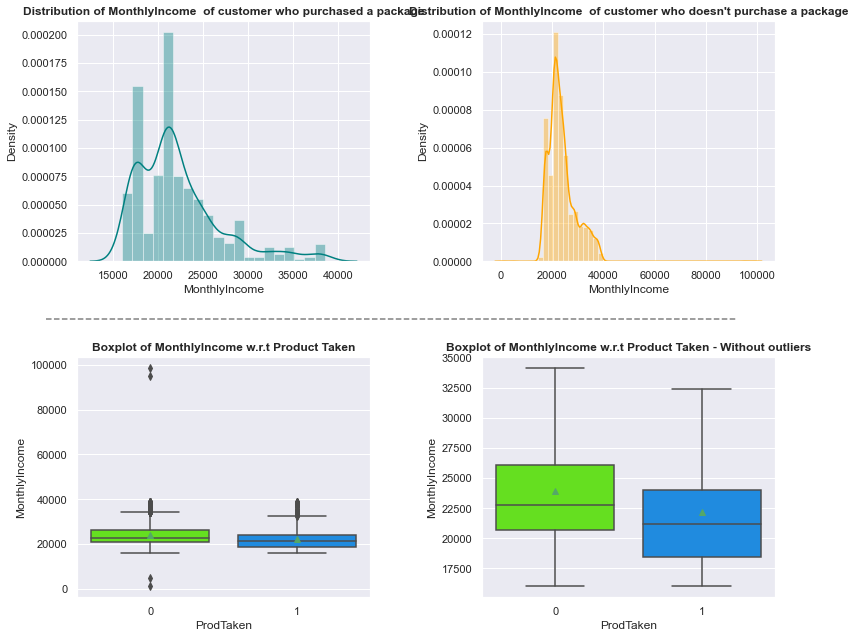

In [50]:
plot('MonthlyIncome')

* Customers with montlhy income less than 20000 are likely to purchase the product package

### Exploring Customer Profile

In [51]:
Cust_Profile =data[data['ProdTaken']==1]

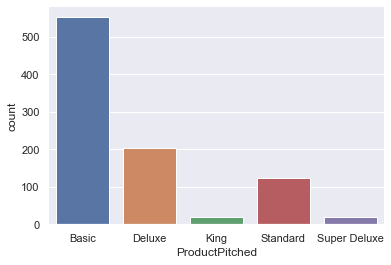

In [52]:
#plt.figure(figsize= [12,12])

sns.countplot(x="ProductPitched", data=Cust_Profile)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

* Basic Package is the most preferred, immediately followed by Deluxe.
* King and Super Deluxe package is the least preferred. 

### Observing Marital Status of Customers vs Product Taken

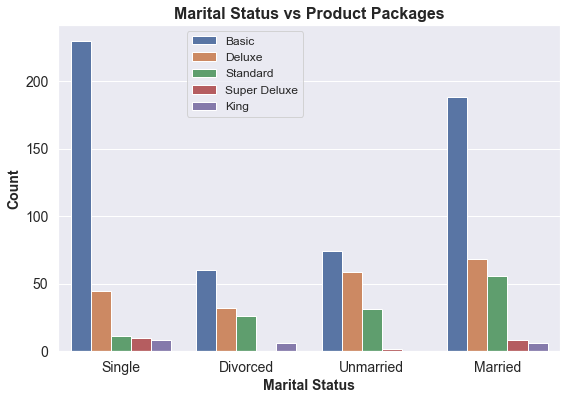

In [53]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='MaritalStatus', hue='ProductPitched', order=['Single','Divorced','Unmarried','Married'],hue_order=['Basic','Deluxe','Standard','Super Deluxe','King'])
plt.xticks(fontsize=14);
plt.xlabel('Marital Status', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12, bbox_to_anchor=(0.5,1));
plt.title('Marital Status vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* It can be observed that across the board not withstanding of marital status, Basic package is the most preferred, immediately followed by Deluxe and standard.
* Super Deluxe and King is the least preferred

### Observing City Tier of Customers vs Product Taken

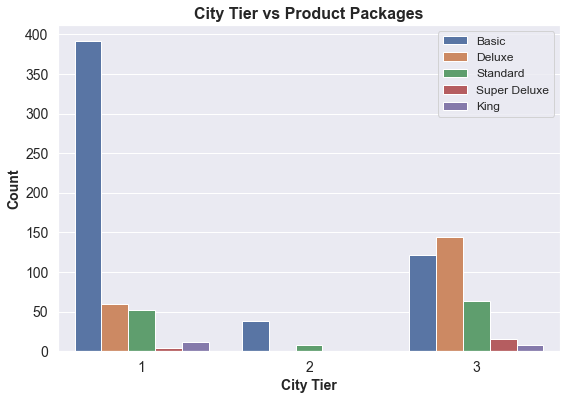

In [54]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='CityTier', hue='ProductPitched', hue_order=['Basic','Deluxe','Standard','Super Deluxe','King']);
plt.xticks(fontsize=14);
plt.xlabel('City Tier', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('City Tier vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* Tier 1 and Tier 2 preferred Basic package. Tier 1 participated most in the package selection. 
* Tier 2 chose only Basic and Standard. Tier 2 does not appear to have participated much.
* Tier 3 preferred Deluxe more than all packages but just slightly above Basic package. The least preferred is Super Deluxe and King. 

### Observing Gender of Customers vs Product Taken

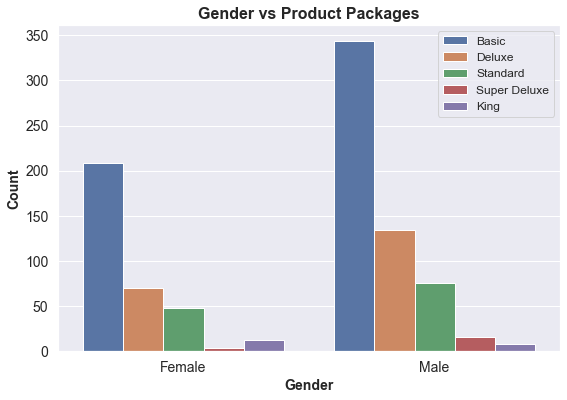

In [55]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='Gender', hue='ProductPitched', hue_order=['Basic','Deluxe','Standard','Super Deluxe','King']);
plt.xticks(fontsize=14);
plt.xlabel('Gender', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Gender vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* We have more male customers than Females.
* notwithstanding, both gender favored Basic, Deluxe and Standard in that order. 

### Observing Number of Persons Visiting vs Product Taken

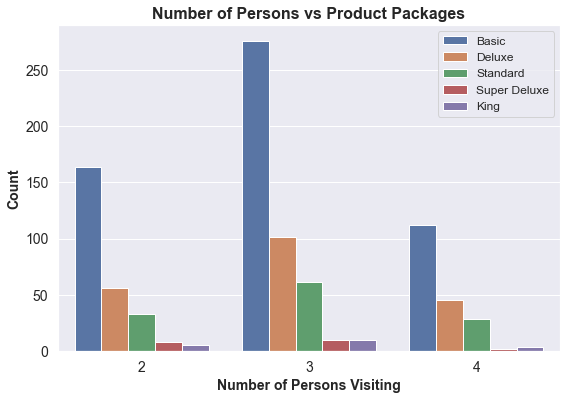

In [56]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='NumberOfPersonVisiting', hue='ProductPitched', hue_order=['Basic','Deluxe','Standard','Super Deluxe','King']);
plt.xticks(fontsize=14);
plt.xlabel('Number of Persons Visiting', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Number of Persons vs Product Packages', fontsize=16, fontweight='bold');

* All customers preferred Basic package more than other packages. Super Deluxe and King is not favored, especially by customers visiting with 4 people. 

### Observing Occupation vs Product Taken

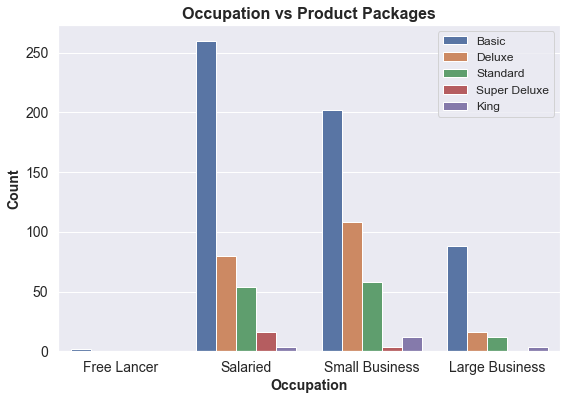

In [57]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='Occupation', hue='ProductPitched', order=['Free Lancer','Salaried','Small Business','Large Business'],hue_order=['Basic','Deluxe','Standard','Super Deluxe','King']);
plt.xticks(fontsize=14);
plt.xlabel('Occupation', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Occupation vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* Salaried and Small Businesses purchased more packages
* The most preferred packages are Basic, Deluxe and  Standard 

### Observing Passport vs Product Taken

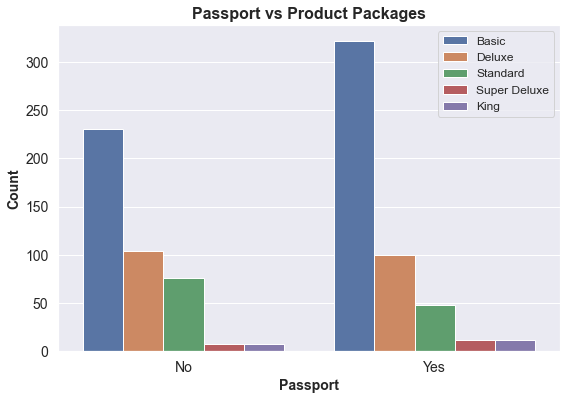

In [58]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='Passport', hue='ProductPitched', hue_order=['Basic','Deluxe','Standard','Super Deluxe','King']);
plt.xticks([0,1], labels=['No','Yes'],fontsize=14);
plt.xlabel('Passport', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Passport vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* Customers with passports are more likely to buy a package
* The most preferred packages are Basic, Deluxe and  Standard 

### Observing Designation vs Product Taken

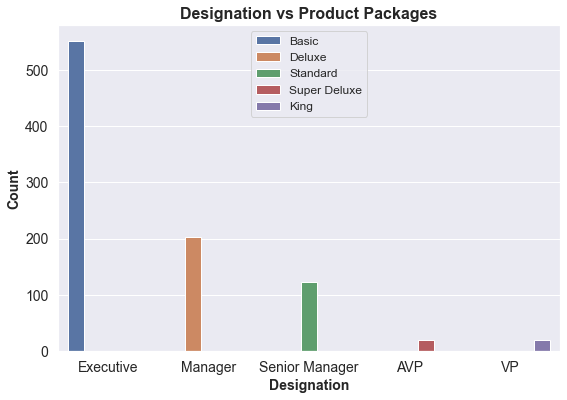

In [59]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='Designation', hue='ProductPitched',order=['Executive','Manager','Senior Manager','AVP','VP'], hue_order=['Basic','Deluxe','Standard','Super Deluxe','King']);
plt.xticks(fontsize=14);
plt.xlabel('Designation', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Designation vs Product Packages', fontsize=16, fontweight='bold');

Observation:

* Executives Preferred Basic Package
* Managers Preferred Deluxe package
* Senior Managers preferred Standard Package
* AVP preferred Super Package
* VP preferred king Package

### Observing Own Car vs Product Taken

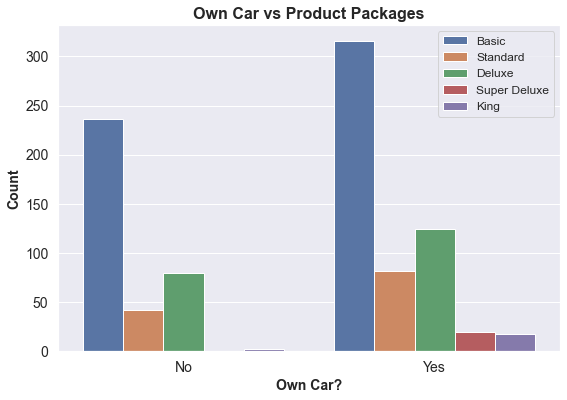

In [60]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='OwnCar', hue='ProductPitched', hue_order=['Basic','Standard','Deluxe','Super Deluxe','King']);
plt.xticks([0,1],labels=['No','Yes'],fontsize=14);
plt.xlabel('Own Car?', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Own Car vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* Customers with own car are likely to purchase a package
* The basic package is still the most preferred
* Customers with no car did not choose super deluxe at all

### Observing Preferred Property Star vs Product Taken

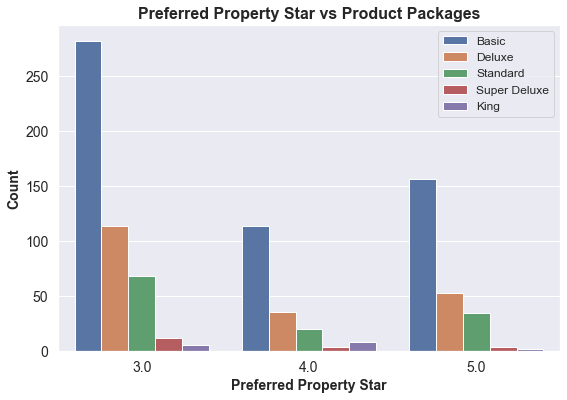

In [61]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data=Cust_Profile, x='PreferredPropertyStar', hue='ProductPitched', hue_order=['Basic','Deluxe','Standard','Super Deluxe','King']);
plt.xticks(fontsize=14);
plt.xlabel('Preferred Property Star', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Preferred Property Star vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* Customers who prefer 3 star properties are likely to buy a package
* Basic package is most preferred package

### Observing Pitch Satisfaction Score Vs Product Packages

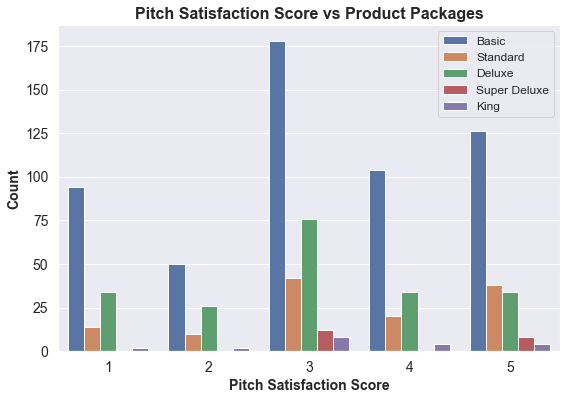

In [62]:
fig = plt.figure(figsize=[9,6]);
sns.countplot(data= Cust_Profile, x='PitchSatisfactionScore', hue='ProductPitched', hue_order=['Basic','Standard','Deluxe','Super Deluxe','King']);
plt.xticks(fontsize=14);
plt.xlabel('Pitch Satisfaction Score', fontsize=14, fontweight='bold');
plt.yticks(fontsize=14);
plt.ylabel('Count', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Pitch Satisfaction Score vs Product Packages', fontsize=16, fontweight='bold');

Observation:
* Customers that scored 3 for pitch Satisfcation are more likely to buy a basic package
* Customers that scored a satisfaction level of 3 are least likely to buy a Super Deluxe Package. 

### Observing Income Vs Product Packages

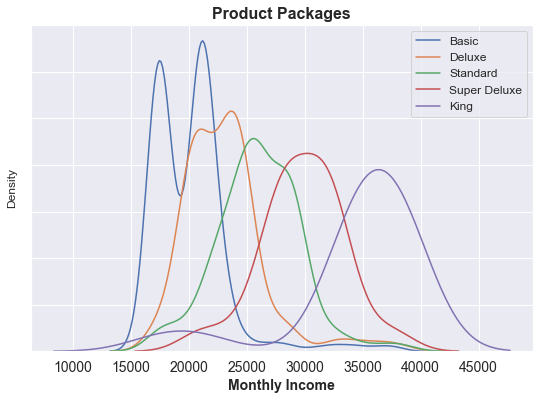

In [63]:
fig = plt.figure(figsize=[9,6]);
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Basic','MonthlyIncome'], kde=True, hist=False, label='Basic');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Deluxe','MonthlyIncome'], kde=True, hist=False, label='Deluxe');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Standard','MonthlyIncome'], kde=True, hist=False, label='Standard');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Super Deluxe','MonthlyIncome'], kde=True, hist=False, label='Super Deluxe');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'King','MonthlyIncome'], kde=True, hist=False, label='King');
plt.yticks(np.arange(0,0.0002,0.000025),labels=['','','','','','','','']);
plt.xticks(fontsize=14);
plt.xlabel('Monthly Income', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Product Packages', fontsize=16, fontweight='bold');

Observations:
* Basic Package: Popular with customers with income range between 15k and 25k
* Deluxe Package: Popular with customers with income range between 20k and 30k
* Standard Package: Popular with customers with income range between 20k and 35k
* Super Deluxe Package: Popular with income range between 25k and 35k
* King: Popular with customers with income range between 30k and 45k.

### Observing Age Vs Product Packages

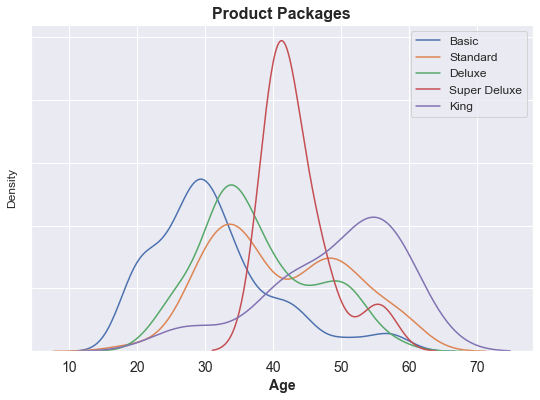

In [64]:
fig = plt.figure(figsize=[9,6]);
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Basic','Age'], kde=True, hist=False, label='Basic');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Standard','Age'], kde=True, hist=False, label='Standard');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Deluxe','Age'], kde=True, hist=False, label='Deluxe');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'Super Deluxe','Age'], kde=True, hist=False, label='Super Deluxe');
sns.distplot(Cust_Profile.loc[Cust_Profile['ProductPitched'] == 'King','Age'], kde=True, hist=False, label='King');
plt.yticks(np.arange(0,0.12,0.02),labels=['','','','','','']);
plt.xticks(fontsize=14)
plt.xlabel('Age', fontsize=14, fontweight='bold');
plt.legend(fontsize=12);
plt.title('Product Packages', fontsize=16, fontweight='bold');

Observation:
* Basic package: popular with customers in their 20s, 30s, and 40s
* Standard and Deluxe packages: skewed towards customers in their 30s and 40s
* Super Deluxe package: popular with customers in their 40s and 50s
* King package: popular with customers in their 40s and 50s

## Missing Value Treatment

In [65]:
#Let's investigate pattern in missingness
data.isnull().sum() #many columns don't have missingness

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

In [66]:
# counting the number of missing values per row
data.isnull().sum(axis=1).value_counts()

0    4114
1     445
4     155
2     102
3      72
dtype: int64

In [67]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    4114
1     445
4     155
2     102
3      72
dtype: int64

#### I'll check the rows that have exactly 2 and exactly 3 missing values to see what's going on.

In [68]:
data[num_missing == 2].sample(n=5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
1804,0,NaN,Self Enquiry,1,14.0,Salaried,Male,3,3.0,Deluxe,...,Married,1.0,0,3,1,0.0,Manager,18697.0,NaN,<20000
965,0,NaN,Self Enquiry,1,25.0,Small Business,Male,3,3.0,Basic,...,Divorced,4.0,0,5,1,2.0,Executive,18669.0,NaN,<20000
1227,0,NaN,Self Enquiry,1,8.0,Salaried,Male,3,3.0,Basic,...,Married,2.0,0,5,0,2.0,Executive,18477.0,NaN,<20000
2258,0,NaN,Self Enquiry,1,16.0,Salaried,Female,2,3.0,Deluxe,...,Single,4.0,0,4,0,1.0,Manager,18660.0,NaN,<20000
1001,0,NaN,Self Enquiry,1,17.0,Small Business,Female,3,3.0,Basic,...,Single,5.0,0,3,0,1.0,Executive,18629.0,NaN,<20000


* some Age values are Nan, implying age of entries are unknown. 

In [69]:
data[num_missing == 3].sample(n=5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin
638,0,25.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,...,Divorced,2.0,0,3,1,1.0,Manager,NaN,18-25,NaN
2052,0,40.0,Company Invited,1,NaN,Small Business,Female,2,1.0,Deluxe,...,Married,2.0,0,3,0,0.0,Manager,NaN,31-40,NaN
504,1,45.0,Company Invited,3,NaN,Salaried,Female,3,3.0,Deluxe,...,Divorced,3.0,0,2,0,0.0,Manager,NaN,41-50,NaN
2074,0,42.0,Self Enquiry,1,NaN,Salaried,Male,3,3.0,Deluxe,...,Married,2.0,0,3,1,0.0,Manager,NaN,41-50,NaN
2294,0,42.0,Self Enquiry,1,NaN,Small Business,Male,2,5.0,Deluxe,...,Single,5.0,0,3,1,1.0,Manager,NaN,41-50,NaN


* Overall it looks like the missingness has a structure to it. I'll now do this programatically to investigate this

In [70]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
DurationOfPitch             154
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
Agebin                       14
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Age              96
MonthlyIncome     6
Agebin           96
Incomebin         6
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
DurationOfPitch    72
MonthlyIncome      72
Incomebin          72
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Age                130
TypeofContact       25
DurationOfPitch     25
MonthlyIncome      155
Agebin             130
Incomebin          155
dtype: int64





#### Treating missing values of 'Age'

In [18]:
#let's group by Designation, Gender and Marital Status for more granularity
data.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()

# Impute missing Age with median value
data["Age"] = data.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median())
)

#### Treating missing values of 'Type of Contact'

In [19]:
#first, let's study its distribution
data['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

In [20]:
#since, self Enquity has the highest number, we will use its mode to impute
data['TypeofContact'].mode()

data['TypeofContact']=data['TypeofContact'].fillna('Self Enquiry')

#### Treating missing values of 'Duration of Pitch'

In [21]:
data.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
data["DurationOfPitch"] = data.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

### Treating missing values of 'Number of Followups'

In [22]:
data.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()
data['NumberOfFollowups']=data.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

### Treating missing values of 'Preferred Property Star'

In [23]:
data.groupby(["Designation"])["NumberOfFollowups"].median()
data['PreferredPropertyStar']=data.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))


### Treating missing values of 'Number of Trips'

In [26]:
#for more granularity, imputing number of trips using 'Marital Status'
data.groupby(['MaritalStatus'])["NumberOfTrips"].median()

MaritalStatus
Divorced     3.0
Married      3.0
Single       2.0
Unmarried    3.0
Name: NumberOfTrips, dtype: float64

In [27]:
# Impute missing NumberOfTrips of pitch with median value
data["NumberOfTrips"] = data.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

### Treating missing values of 'Number of Children Visiting'

In [28]:
# Impute missing NumberOfChildrenVisited with 0, assuming no children accompanied 
# customers without that data
data['NumberOfChildrenVisiting']=data['NumberOfChildrenVisiting'].fillna(0)

### Treating missing values of 'Monthly Income'

In [29]:
#Imputing on designation, gender and occupation
data["MonthlyIncome"]=data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

### Treating missing values of 'Duration of Pitch'

In [30]:
#let's group by features related to Duration of Pitch
data.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
data["DurationOfPitch"] = data.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

In [31]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [32]:
#Let's reiterate income and age bins to get rid of the nulls
data['Incomebin'] = pd.cut(data['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [33]:
data['Agebin'] = pd.cut(data['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [34]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Incomebin                   0
Agebin                      0
dtype: int64

* Now, there are no null values

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [35]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [36]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age                         0.000000
DurationOfPitch             2.250409
NumberOfPersonVisiting      0.061375
NumberOfFollowups           6.382979
PreferredPropertyStar       0.000000
NumberOfTrips               2.229951
NumberOfChildrenVisiting    0.000000
MonthlyIncome               7.528642
dtype: float64

* with focus on data that will be availabe for potential customers, we will handle outliers pertaining to such data such as number of trips, duration of pitch and monthly income

In [37]:
# Check MonthlyIncome extreme values
data.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Incomebin,Agebin
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,...,Divorced,2.0,1,2,1,1.0,Executive,98678.0,<100000,31-40
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,...,Divorced,1.0,1,2,1,0.0,Executive,95000.0,<100000,31-40
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,...,Divorced,2.0,0,2,1,2.0,VP,38677.0,<40000,51-70
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,...,Married,2.0,0,1,1,3.0,VP,38677.0,<40000,51-70
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,...,Married,3.0,0,4,1,1.0,VP,38651.0,<40000,41-50


In [38]:
# Check NumberOfTrips extreme values
data.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Incomebin,Agebin
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,...,Unmarried,22.0,0,2,1,1.0,Manager,25460.0,<30000,31-40
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,...,Unmarried,21.0,0,2,1,0.0,Manager,21782.0,<25000,31-40
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,...,Single,20.0,1,4,1,2.0,Executive,20963.0,<25000,26-30
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,...,Single,19.0,1,4,1,1.0,Executive,17285.0,<20000,26-30
3155,1,30.0,Self Enquiry,1,17.0,Salaried,Female,4,5.0,Basic,...,Single,8.0,1,5,1,2.0,Executive,21082.0,<25000,26-30


* We can observe 4 extreme values here

#### Removing these outliers from duration of pitch, monthly income, and number of trips.

In [39]:
#Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are just 4 such observations
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)

## Split the data into train and test sets

When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
This is done by setting the stratify parameter to target variable in the train_test_split function.

In [41]:
# Separating target column
X = data.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken']

In [42]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3414, 23), (1464, 23))

### Building the model

### Model can make wrong predictions as:
* Predicting a customer will take the package and the customer doesn't buy the package - Loss of Resources(marketing and pitching)
* Predicting a customer will not take the package and the customer takes the package - Loss of opportunity


### Which case is more important?
* Predicting a customer will take the package and the customer doesn't buy the package - Loss of Resources(marketing and pitching)

### Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.

In [43]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [44]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [45]:
# # defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

## Building the model

In [46]:
## let's build Decision Tree,Bagging Classifier and Random Forests models on the train data and observe their performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Decision Tree

In [47]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.864754,1.0,0.605072,1.0,0.652344,1.0,0.62782


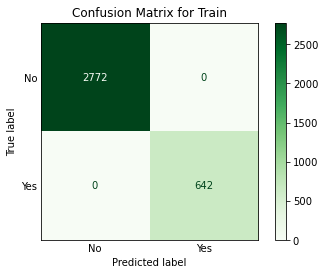

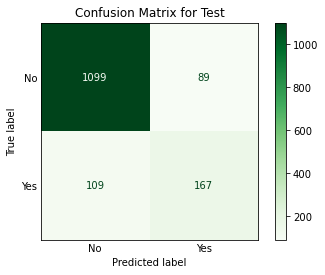

In [48]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

Observation

Decision tree is overfitting the training data as there is lot of disparity between test and train.Recall score is also not that high

### Bagging Classifier

In [49]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


BaggingClassifier(random_state=1, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.990334,0.891393,0.953271,0.532609,0.995122,0.830508,0.973747,0.649007


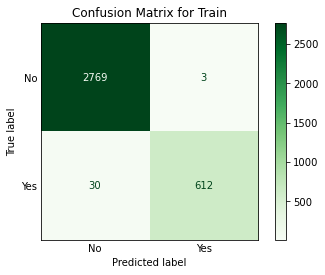

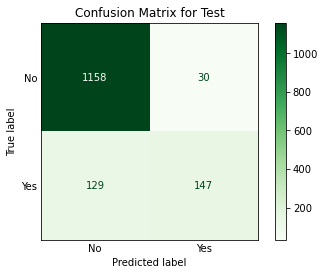

In [50]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

Observation:

Bagging is still overfitting the training data , Recall score has decreased for test data

### Random Forest

In [51]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.894809,1.0,0.518116,1.0,0.871951,1.0,0.65


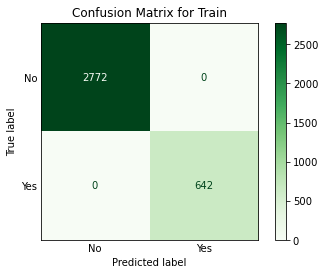

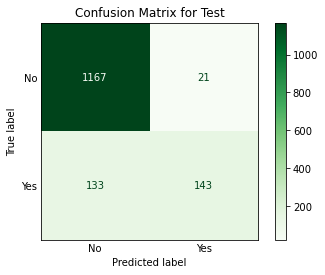

In [52]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

* Random forest is also overfitting the traning data

### Model Performance Evaluation and Improvement-Bagging

In [53]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.000000,0.864754,1.000000,0.605072,1.000000,0.652344,1.000000,0.627820
1,Bagging Classifier,0.990334,0.891393,0.953271,0.532609,0.995122,0.830508,0.973747,0.649007
2,Random Forest,1.000000,0.894809,1.000000,0.518116,1.000000,0.871951,1.000000,0.650000


### Tuning Decision Tree

In [54]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]
              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=7,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.785589,0.766393,0.680685,0.663043,0.45332,0.423611,0.544209,0.516949


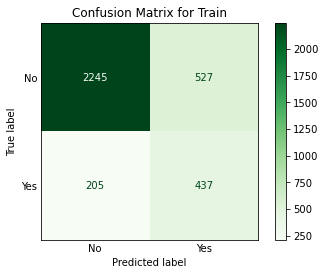

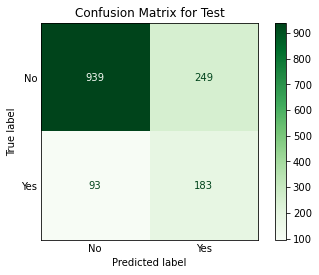

In [55]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

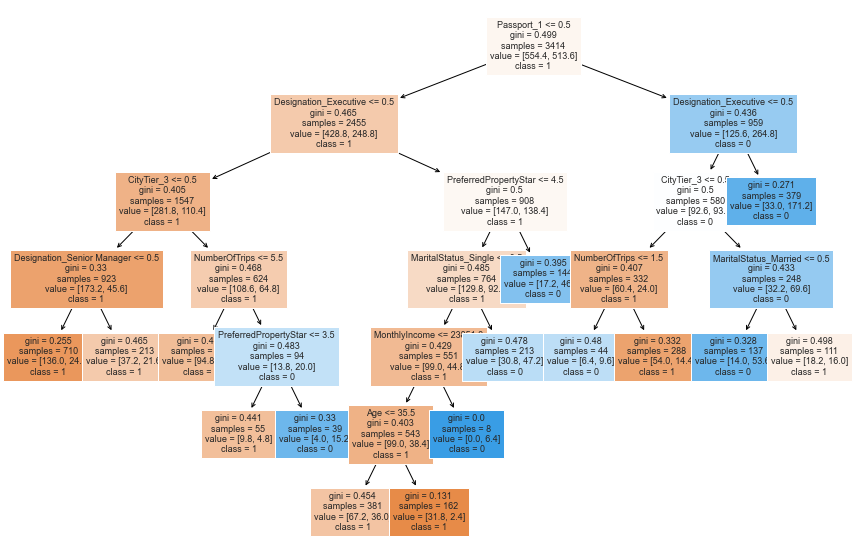

In [106]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [107]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Passport_1                  0.313846
Designation_Executive       0.233211
CityTier_3                  0.130937
PreferredPropertyStar       0.087380
MaritalStatus_Single        0.057064
NumberOfTrips               0.051876
MonthlyIncome               0.041563
MaritalStatus_Married       0.031417
Designation_Senior Manager  0.026593
Age                         0.026114
Designation_Manager         0.000000
OwnCar_1                    0.000000
MaritalStatus_Unmarried     0.000000
Occupation_Small Business   0.000000
Gender_Male                 0.000000
NumberOfPersonVisiting      0.000000
Occupation_Salaried         0.000000
Occupation_Large Business   0.000000
CityTier_2                  0.000000
TypeofContact_Self Enquiry  0.000000
NumberOfChildrenVisiting    0.000000
Designation_VP              0.000000


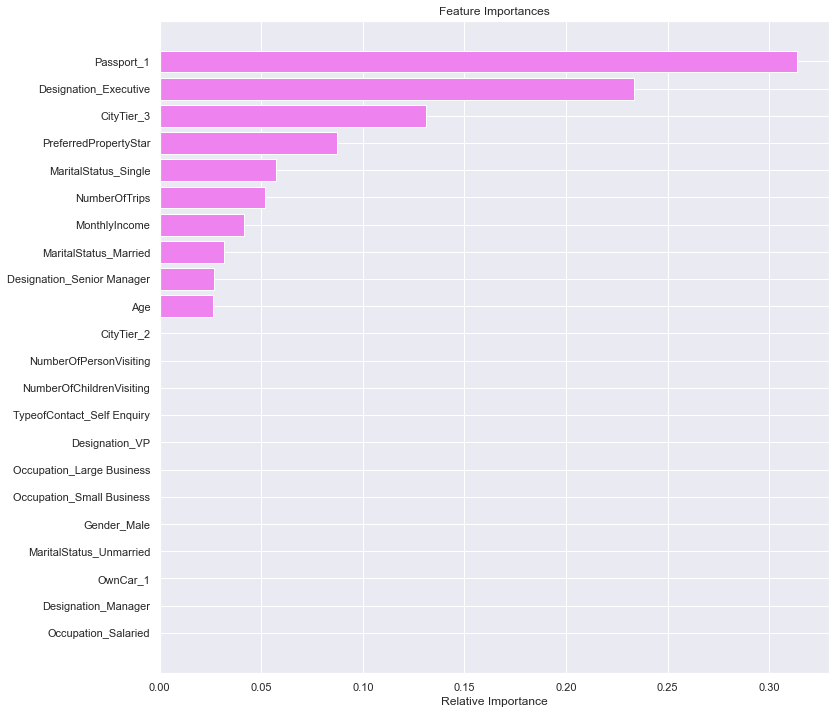

In [108]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Most Important features are passport , Desgination as Executive,City tier 3.

### Tuning Random Forest

In [109]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
# parameters = {"n_estimators": [50,80,150], 
#               "max_depth": [1,2,3], 
#               "min_samples_split": [3,4,6,7],"max_features": ['auto'],
#              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_samples=0.3, min_samples_leaf=9, n_estimators=500,
                       random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.824839,0.812158,0.637072,0.623188,0.528424,0.501458,0.577684,0.555735


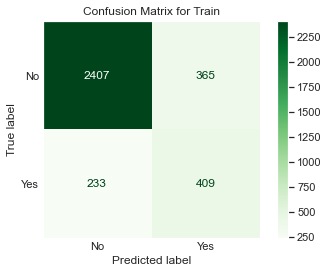

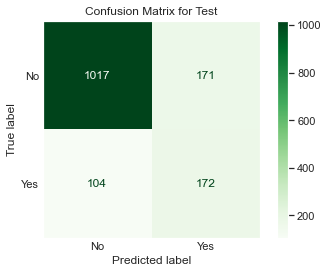

In [110]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 

In [111]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Passport_1                  0.191149
MonthlyIncome               0.129708
Age                         0.128615
Designation_Executive       0.126581
MaritalStatus_Single        0.064283
CityTier_3                  0.051198
NumberOfTrips               0.047777
PreferredPropertyStar       0.041450
Designation_Manager         0.041305
MaritalStatus_Married       0.037201
NumberOfChildrenVisiting    0.016482
NumberOfPersonVisiting      0.016079
MaritalStatus_Unmarried     0.014718
Gender_Male                 0.014303
TypeofContact_Self Enquiry  0.014047
Designation_Senior Manager  0.012997
Occupation_Small Business   0.011551
Occupation_Salaried         0.011329
OwnCar_1                    0.009465
Occupation_Large Business   0.008972
Designation_VP              0.006790
CityTier_2                  0.004000


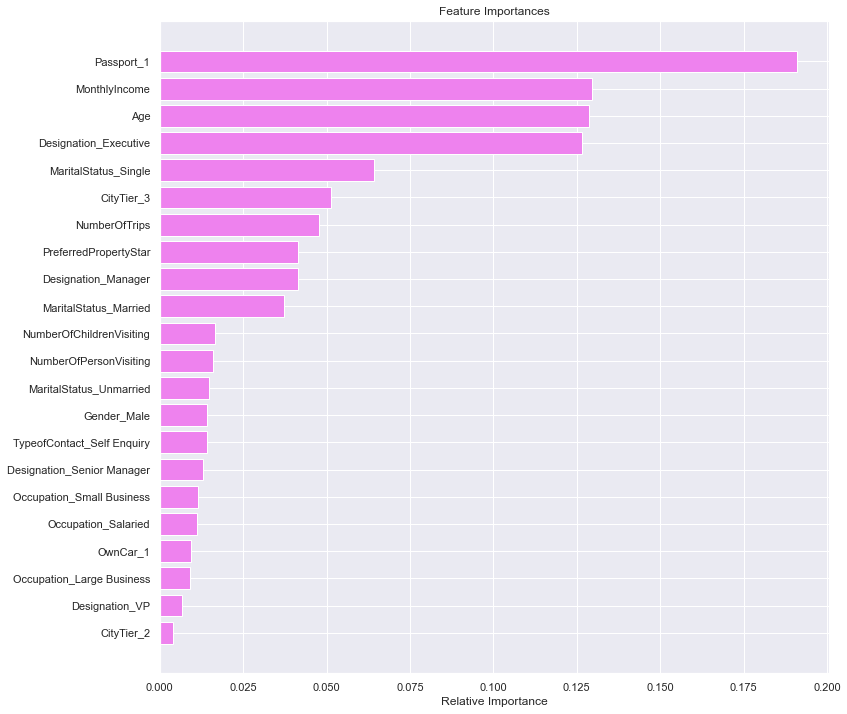

In [112]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


* Important features are Passport,Monthly Income,Age, designation executive.

### Tuning Bagging Classifier

In [113]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.998243,0.879098,0.990654,0.460145,1.0,0.819355,0.995305,0.589327


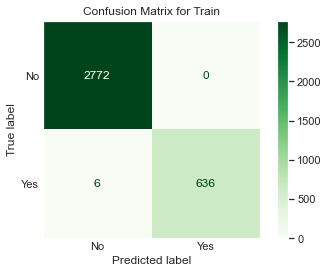

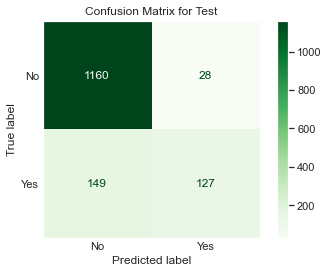

In [114]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

In [115]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
3,Tuned Decision Tree,0.785589,0.766393,0.680685,0.663043,0.453320,0.423611,0.544209,0.516949
4,Tuned Random Forest,0.824839,0.812158,0.637072,0.623188,0.528424,0.501458,0.577684,0.555735
0,Decision Tree,1.000000,0.852459,1.000000,0.586957,1.000000,0.613636,1.000000,0.600000
1,Bagging Classifier,0.990334,0.886612,0.953271,0.510870,0.995122,0.819767,0.973747,0.629464
2,Random Forest,1.000000,0.887295,1.000000,0.485507,1.000000,0.853503,1.000000,0.618938
5,Tuned Bagging Classifier,0.998243,0.879098,0.990654,0.460145,1.000000,0.819355,0.995305,0.589327


## Boosting

## Adaboost

In [116]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.845929,0.845628,0.303738,0.286232,0.711679,0.731481,0.425764,0.411458


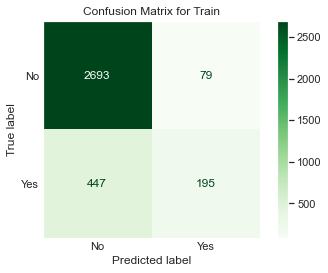

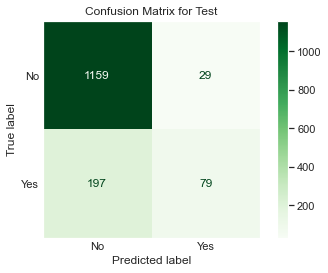

In [117]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

## Gradient Boost

In [118]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.879613,0.861339,0.450156,0.384058,0.832853,0.76259,0.584429,0.510843


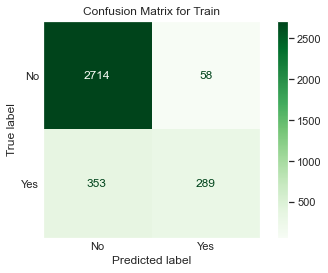

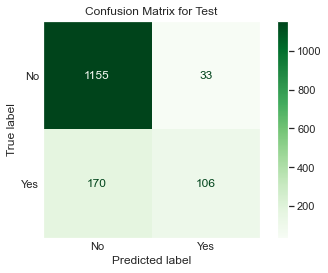

In [119]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)

### Conclusions

Marketing and Sales should be tailored according to the following customer profiles:

 Age:
 - Basic to be targeted to youth 
 - Standard & Deluxe& Super Deluxe to be targeted at the mid aged
 - King to be targeted at the elderly (over 50)

Income:
 - Basic -  earners of 15k - 25k
 - Deluxe, Standard, Super Deluxe - earners of 25k - 35k
 - King - earners of 30k - 45k and the affluent

Marital Status:
 - Basic -  nonwitstanding of marital status
 - Deluxe -  nonwitstanding of marital status
 - Standard - Divorced, Unmarried, & Married
 - Super Deluxe - Single & Married
 - King - Single, Divorced, & Married

City Tier
 - Basic - 1, 2, & 3
 - Deluxe - 1 & 3
 - Standard - 1 & 3
 - Super Deluxe - 3
 - King - 1 & 3


Number of Persons
 - Basic, Deluxe, Standard, & King - 2, 3, & 4
 - Super Deluxe - 2 & 3

Occupation
 - Basic, Deluxe, Standard, & King - Salaried, Small Business, and Large Business
 - Super Deluxe - Salaried & Small Business
 - Freelancers very unlikely to purchase travel package

Preferred Property Scores
 - Basic - 3, 4, & 5
 - Deluxe, Standard, and Super Deluxe - Predominately 3
 - King - 3 & 4 but predominately 4

Passport
Basic more likely for International Travel

Designation
 - Basic - Executive
 - Deluxe - Manager
 - Standard - Senior Manager
 - Super Deluxe - AVP
 - King - VP

Follow-ups
 - Expect 3-5 follow-ups before purchase
 
 On Average:
 - Basic, Deluxe, Standard, & King - 4 follow-ups
 - Super Deluxe - 3 ** There is some indication that by increasing follow-ups to at least 4, this may result in an uptick in sales.


